# A

In [14]:
import numpy as np 
import nibabel as nib
import matplotlib.pyplot as plt
import importlib

In [ ]:
# Load magnitude and phase from in-vivo acquisitions

mag_img = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_mag_T0000.nii.gz")
phs_img = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_phs.nii.gz")

mag_data = mag_img.get_fdata()
phs_data = phs_img.get_fdata()

phs_data_e1 = phs_data[:, :, :, 0]  # First echo phase data

phase_radians_e1 = (phs_data_e1 - 2048) / 2048 * np.pi

complex_data_e1 = mag_data * np.exp(1j * phase_radians_e1)

kspace_data_e1 = np.fft.fftn(complex_data_e1)
kspace_data_e1_shifted = np.fft.fftshift(kspace_data_e1)



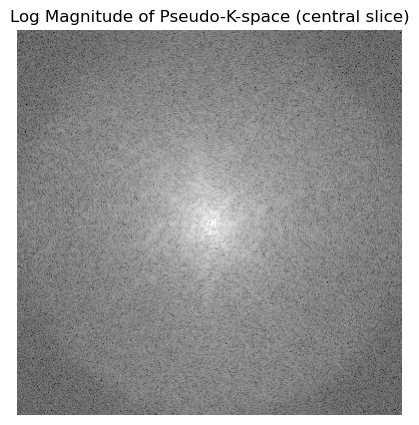

In [10]:
plt.figure(figsize=(6,5))
plt.imshow(np.log(np.abs(kspace_data_e1_shifted[:, :, kspace_data_e1_shifted.shape[2]//2]) + 1e-6), cmap='gray')
plt.title("Log Magnitude of Pseudo-K-space (central slice)")
plt.axis('off')
plt.show()

In [12]:
kspace_data_img = nib.Nifti1Image((kspace_data_e1_shifted), mag_img.affine)
nib.save(kspace_data_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_kspace_e1_mag.nii.gz")

In [13]:
# Create a dipole kernel with same dimensions (or custom dimensions)
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)

c:\Users\Admin\Documents\msc_project\Image-processing-strategies


In [15]:
import monkey_tools.dipole_kernel
importlib.reload(monkey_tools.dipole_kernel)

from monkey_tools.dipole_kernel import dipole_kernel  # re-import updated function

In [ ]:
matrix_size = mag_img.shape[:3]
print("Matrix size: ", matrix_size)
voxel_size = mag_img.header.get_zooms()[:3]
print("Voxel size: ", voxel_size)
# Confirm if you can with a viewer or a tool that enables checking this Nifti properties

Matrix size:  (384, 384, 16)
Voxel size:  (np.float32(0.442708), np.float32(0.442708), np.float32(5.0))


In [18]:
D_cont = dipole_kernel(matrix_size, voxel_size, kernel_model=0)
D_discrete = dipole_kernel(matrix_size, voxel_size, kernel_model=1)

In [19]:
# Now save this !
D_cont_img = nib.Nifti1Image(np.real(D_cont), mag_img.affine)
nib.save(D_cont_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_dipole_kernel_cont.nii.gz")
D_discrete_img = nib.Nifti1Image(np.real(D_discrete), mag_img.affine)
nib.save(D_discrete_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_dipole_kernel_discrete.nii.gz")